In [90]:
import pandas as pd 
import numpy as np
from datetime import datetime as dt
from datetime import time
from pathlib import Path
import hvplot.pandas
%matplotlib inline 
import seaborn as sns
import matplotlib.pyplot as plt

In [91]:
csv_path_spy= Path("../Project_1/five_min_spy_data_frame.csv")

In [92]:
spy_df = pd.read_csv(csv_path_spy,infer_datetime_format= True,
                    parse_dates = True)

spy_df.head()

,date,high,low,open,close,volume
0,2019-09-18 16:00:00,301.120,300.88,300.9200,301.1000,2610142
1,2019-09-18 15:55:00,301.115,300.78,301.0700,300.9300,1530074
2,2019-09-18 15:50:00,301.220,300.87,301.1100,301.0750,1008201
3,2019-09-18 15:45:00,301.110,300.79,300.8371,301.1099,1331334
4,2019-09-18 15:40:00,300.860,300.68,300.8600,300.8300,1685182


In [93]:
# Change 'date' column name to 'date & time' because
# there will be a new 'date' column
spy_df['date_time'] = spy_df['date']
spy_df = spy_df.drop(columns='date')

spy_df.tail()

,high,low,open,close,volume,date_time
1110,286.9000,286.3800,286.5900,286.7910,1040474,2019-08-28 09:55:00
1111,286.7962,286.2357,286.2803,286.4403,1594274,2019-08-28 09:50:00
1112,286.3500,285.5300,285.7700,286.2500,1180551,2019-08-28 09:45:00
1113,286.2480,285.5173,285.5907,285.7807,2108159,2019-08-28 09:40:00
1114,286.4500,285.5100,286.1400,285.5800,3314079,2019-08-28 09:35:00


In [94]:
# Create new 'date' and 'time' columns out of data from
# 'date & time' column
spy_df['time'] = pd.to_datetime(spy_df['date_time']).dt.time
spy_df['date'] = pd.to_datetime(spy_df['date_time']).dt.date

spy_df.tail()

,high,low,open,close,volume,date_time,time,date
1110,286.9000,286.3800,286.5900,286.7910,1040474,2019-08-28 09:55:00,09:55:00,2019-08-28
1111,286.7962,286.2357,286.2803,286.4403,1594274,2019-08-28 09:50:00,09:50:00,2019-08-28
1112,286.3500,285.5300,285.7700,286.2500,1180551,2019-08-28 09:45:00,09:45:00,2019-08-28
1113,286.2480,285.5173,285.5907,285.7807,2108159,2019-08-28 09:40:00,09:40:00,2019-08-28
1114,286.4500,285.5100,286.1400,285.5800,3314079,2019-08-28 09:35:00,09:35:00,2019-08-28


In [95]:
# Change datatype of 'date & time' column to datetime
spy_df['date_time'] = spy_df['date_time'].apply(pd.to_datetime)

In [96]:
# create new 'weekday' column
# NOTE: days of week are: 0-4
spy_df['weekday'] = spy_df['date_time'].dt.dayofweek

spy_df.sample(5)

,high,low,open,close,volume,date_time,time,date,weekday
243,300.94,300.7501,300.80,300.83,525105,2019-09-13 15:15:00,15:15:00,2019-09-13,4
802,293.33,293.2000,293.33,293.23,199186,2019-09-04 14:10:00,14:10:00,2019-09-04,2
345,302.21,302.0800,302.16,302.11,1362991,2019-09-12 13:15:00,13:15:00,2019-09-12,3
775,297.73,297.4300,297.49,297.58,1027245,2019-09-05 09:55:00,09:55:00,2019-09-05,3
868,290.18,290.0000,290.02,290.18,866722,2019-09-03 15:10:00,15:10:00,2019-09-03,1


In [8]:
"""
# Create column 'trading_hour' from 'date_time' info
spy_df['trading_hour'] = spy_df['date_time'].dt.hour
spy_df
"""

"\n# Create column 'trading_hour' from 'date_time' info\nspy_df['trading_hour'] = spy_df['date_time'].dt.hour\nspy_df\n"

In [9]:
"""
# Binning the hours of the day, same as above, but hours are 1-8
# rather than military-style

spy_df = spy_df.assign(trading_hour=pd.cut(spy_df['date_time'].dt.minute,
                                           [0,9,10,11,12,13,14,15,16],
                                           labels=[1,2,3,4,5,6,7,8]
                                          )
                      )
spy_df.head()
"""

"\n# Binning the hours of the day, same as above, but hours are 1-8\n# rather than military-style\n\nspy_df = spy_df.assign(trading_hour=pd.cut(spy_df['date_time'].dt.minute,\n                                           [0,9,10,11,12,13,14,15,16],\n                                           labels=[1,2,3,4,5,6,7,8]\n                                          )\n                      )\nspy_df.head()\n"

In [10]:
# Define function to assign int to trading hours
def trading_hour(ts):
    
    if ts <= time(10, 30):
        return 1
    elif ts <= time(11, 30):
        return 2
    elif ts <= time(12, 30):
        return 3
    elif ts <= time(13, 30):
        return 4
    elif ts <= time(14, 30):
        return 5
    #elif ts <= time(15, 30):
        #return 6
    else:
        return 7

# Create 'trading_hour' column
spy_df['trading_hour'] = spy_df['time'].apply(trading_hour)
spy_df

,high,low,open,close,volume,date_time,time,date,weekday,trading_hour
0,301.1200,300.8800,300.9200,301.1000,2610142,2019-09-18 16:00:00,16:00:00,2019-09-18,2,7
1,301.1150,300.7800,301.0700,300.9300,1530074,2019-09-18 15:55:00,15:55:00,2019-09-18,2,7
2,301.2200,300.8700,301.1100,301.0750,1008201,2019-09-18 15:50:00,15:50:00,2019-09-18,2,7
3,301.1100,300.7900,300.8371,301.1099,1331334,2019-09-18 15:45:00,15:45:00,2019-09-18,2,7
4,300.8600,300.6800,300.8600,300.8300,1685182,2019-09-18 15:40:00,15:40:00,2019-09-18,2,7
5,300.8300,300.0400,300.0800,300.8100,2018739,2019-09-18 15:35:00,15:35:00,2019-09-18,2,7
6,300.0700,299.8600,299.8800,300.0100,927824,2019-09-18 15:30:00,15:30:00,2019-09-18,2,7
7,299.9900,299.7300,299.8517,299.8800,2472039,2019-09-18 15:25:00,15:25:00,2019-09-18,2,7
8,299.8800,299.4900,299.5600,299.8500,894520,2019-09-18 15:20:00,15:20:00,2019-09-18,2,7
9,299.6800,299.4950,299.5200,299.5450,3096953,2019-09-18 15:15:00,15:15:00,2019-09-18,2,7


In [11]:
spy_df.sort_values('date')


,high,low,open,close,volume,date_time,time,date,weekday,trading_hour
1114,286.4500,285.5100,286.1400,285.5800,3314079,2019-08-28 09:35:00,09:35:00,2019-08-28,2,1
1057,288.5800,288.3800,288.3900,288.5500,202583,2019-08-28 14:20:00,14:20:00,2019-08-28,2,5
1058,288.5900,288.3800,288.5300,288.4000,982835,2019-08-28 14:15:00,14:15:00,2019-08-28,2,5
1059,288.5400,288.4000,288.4635,288.5300,168994,2019-08-28 14:10:00,14:10:00,2019-08-28,2,5
1060,288.6400,288.4116,288.4900,288.4600,422441,2019-08-28 14:05:00,14:05:00,2019-08-28,2,5
1061,288.6200,288.4300,288.5500,288.4800,324952,2019-08-28 14:00:00,14:00:00,2019-08-28,2,5
1062,288.6900,288.4400,288.6650,288.5400,290261,2019-08-28 13:55:00,13:55:00,2019-08-28,2,5
1063,288.7400,288.4900,288.6000,288.6650,501859,2019-08-28 13:50:00,13:50:00,2019-08-28,2,5
1056,288.6000,288.4250,288.5550,288.5300,212590,2019-08-28 14:25:00,14:25:00,2019-08-28,2,5
1064,288.6600,288.5400,288.6400,288.5950,121758,2019-08-28 13:45:00,13:45:00,2019-08-28,2,5


In [12]:
spy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
high            1115 non-null float64
low             1115 non-null float64
open            1115 non-null float64
close           1115 non-null float64
volume          1115 non-null int64
date_time       1115 non-null datetime64[ns]
time            1115 non-null object
date            1115 non-null object
weekday         1115 non-null int64
trading_hour    1115 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(3), object(2)
memory usage: 87.2+ KB


In [13]:
spy_cleaned_df = spy_df[spy_df['date_time']>= '2019-09-03'].sort_values('date_time')

In [14]:
spy_cleaned_df.head(5)

,high,low,open,close,volume,date_time,time,date,weekday,trading_hour
935,291.0718,290.5613,290.5776,290.6175,4822146,2019-09-03 09:35:00,09:35:00,2019-09-03,1,1
934,291.0900,290.6000,290.6100,290.9500,1320719,2019-09-03 09:40:00,09:40:00,2019-09-03,1,1
933,291.3791,290.9088,290.9557,291.0957,738767,2019-09-03 09:45:00,09:45:00,2019-09-03,1,1
932,291.3050,290.6600,291.1000,290.8850,791261,2019-09-03 09:50:00,09:50:00,2019-09-03,1,1
931,291.5400,290.9000,290.9000,291.4900,996429,2019-09-03 09:55:00,09:55:00,2019-09-03,1,1


In [15]:
spy_cleaned_df.set_index('date_time',inplace=True)

In [16]:
spy_cleaned_df.head()

,high,low,open,close,volume,time,date,weekday,trading_hour
date_time,,,,,,,,,
2019-09-03 09:35:00,291.0718,290.5613,290.5776,290.6175,4822146,09:35:00,2019-09-03,1,1
2019-09-03 09:40:00,291.0900,290.6000,290.6100,290.9500,1320719,09:40:00,2019-09-03,1,1
2019-09-03 09:45:00,291.3791,290.9088,290.9557,291.0957,738767,09:45:00,2019-09-03,1,1
2019-09-03 09:50:00,291.3050,290.6600,291.1000,290.8850,791261,09:50:00,2019-09-03,1,1
2019-09-03 09:55:00,291.5400,290.9000,290.9000,291.4900,996429,09:55:00,2019-09-03,1,1


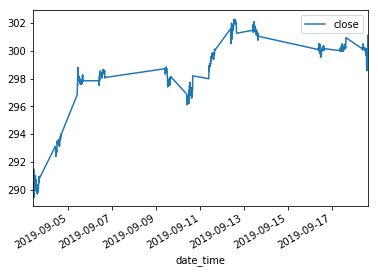

In [17]:
spy_cleaned_df.plot(y='close')

In [18]:
spy_cleaned_df['5min_returns']=spy_cleaned_df['close'].pct_change()

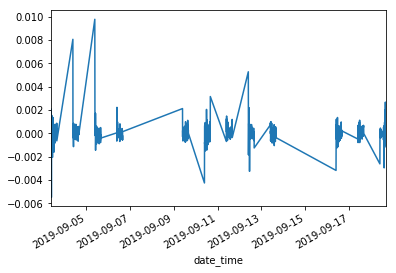

In [19]:
spy_cleaned_df['5min_returns'].plot()

In [20]:
spy_cleaned_df.head

<bound method NDFrame.head of                          high       low      open     close   volume  \
date_time                                                              
2019-09-03 09:35:00  291.0718  290.5613  290.5776  290.6175  4822146   
2019-09-03 09:40:00  291.0900  290.6000  290.6100  290.9500  1320719   
2019-09-03 09:45:00  291.3791  290.9088  290.9557  291.0957   738767   
2019-09-03 09:50:00  291.3050  290.6600  291.1000  290.8850   791261   
2019-09-03 09:55:00  291.5400  290.9000  290.9000  291.4900   996429   
2019-09-03 10:00:00  291.6000  291.2500  291.4800  291.3500   469532   
2019-09-03 10:05:00  291.6200  289.7200  291.1700  289.7500  5496366   
2019-09-03 10:10:00  290.1120  289.5715  289.7394  289.6644  1865194   
2019-09-03 10:15:00  289.9450  289.3800  289.6500  289.4400  1364689   
2019-09-03 10:20:00  289.9500  289.2700  289.4600  289.8300  1196459   
2019-09-03 10:25:00  290.0200  289.7400  289.8200  289.8200  1079803   
2019-09-03 10:30:00  290.5581  289

## Distribution of Returns 

In [160]:
pop_df = spy_cleaned_df
    

pop_df = pop_df.iloc[1:]
# spy_cleaned_df['5min_returns'].hist(bins=200)
histogram = pop_df['5min_returns']

In [129]:
pop_mean = pop_df.groupby('trading_hour').mean()

pop_mu = pop_mean['5min_returns'].mean()
pop_mu

3.415687607971821e-05

## Distribution of all 5 minute interval returns over time period 

NameError: name 'xticks' is not defined

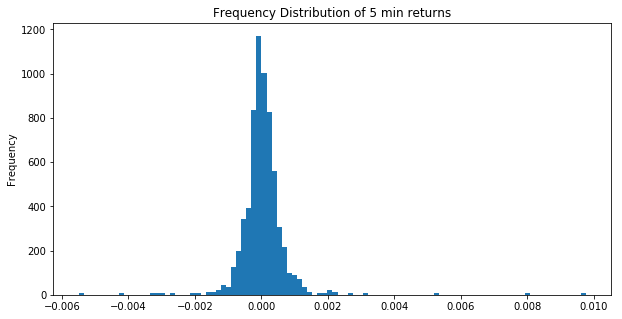

In [167]:
plt.figure()

histogram_plot = histogram.plot(figsize = (10,5),kind='hist', density = True, bins =100, title = "Frequency Distribution of 5 min returns")

# pop_df.hist('5min_returns',bins=100)

# plt.xlabel = 
xticks(np.arange(0, 0.5, step=0.05))

## Distribution of all hour 7 2:30-4 PM returns over time period

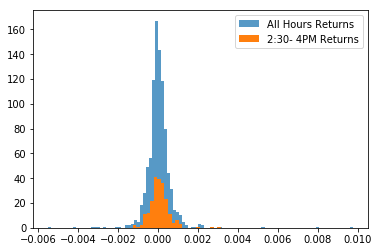

In [157]:

from matplotlib import pyplot

x = pop_df['5min_returns']
y = spy_cleaned_df[spy_cleaned_df['trading_hour']==7]['5min_returns'].values

bins = np.linspace(-1, 1, 2)

pyplot.hist(x, bins=100, alpha=0.75, label='All Hours Returns')
pyplot.hist(y, bins=25, alpha=1, label='2:30- 4PM Returns')
pyplot.legend(loc='upper right')
pyplot.show()

In [121]:
pop_std = pop_df.groupby('trading_hour').std()

pop_std= pop_std['5min_returns'].mean()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E33A66B358>]],
      dtype=object)

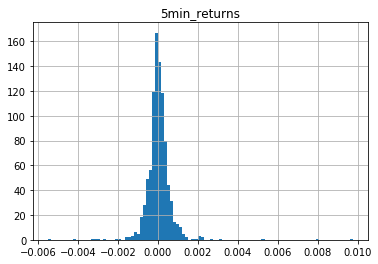

In [68]:
pop_df.hist('5min_returns',bins=100)

In [55]:
# total_distribution = pd.DataFrame(spy_cleaned_df['5min_returns'])

# total_distribution['5min_returns'].mean()

# total_u.hist('5min_returns',bins=100)

In [56]:
hour_mean = spy_cleaned_df.groupby('trading_hour').mean()
# [['5min_returns']]
hour_mean

,high,low,open,close,volume,weekday,5min_returns
trading_hour,,,,,,,
1,298.208010,297.844190,298.005987,298.014801,1.033692e+06,1.916667,0.000176
2,298.268372,298.033804,298.149128,298.143380,6.223042e+05,1.916667,-0.000011
3,298.281449,298.102757,298.193616,298.191924,5.276795e+05,1.916667,-0.000006
4,298.253665,298.093758,298.171070,298.175762,4.427882e+05,1.916667,0.000010
5,298.196867,298.013198,298.111974,298.097049,4.942696e+05,1.916667,-0.000053
7,298.291667,298.098164,298.180371,298.207172,8.521845e+05,1.916667,0.000088


In [28]:
hour_std = spy_cleaned_df.groupby('trading_hour').std()
hour_std

,high,low,open,close,volume,weekday,5min_returns
trading_hour,,,,,,,
1,3.211111,3.276182,3.250815,3.265910,850547.387861,1.324857,0.001509
2,3.286425,3.335665,3.320518,3.308830,541353.598812,1.324857,0.000530
3,3.132157,3.176897,3.156721,3.148446,367141.271859,1.324857,0.000453
4,3.187940,3.226359,3.201823,3.208043,363439.555920,1.324857,0.000378
5,3.319441,3.333610,3.325524,3.326159,456705.676036,1.324857,0.000436
7,3.175780,3.186903,3.186218,3.177136,766005.850700,1.323315,0.000510


In [29]:
sharpe_5min = hour_mean['5min_returns']/hour_std['5min_returns']

In [30]:
#5min returns but if made into daily it would be significantly higher 
# 1 min data would draw the best inferences to track intrahour returns 
sharpe_5min

trading_hour
1    0.116666
2   -0.020587
3   -0.013053
4    0.026708
5   -0.120785
7    0.172790
Name: 5min_returns, dtype: float64

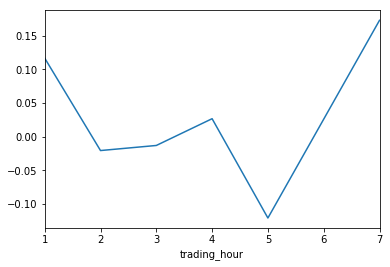

In [31]:
sharpe_5min.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E3385129E8>]],
      dtype=object)

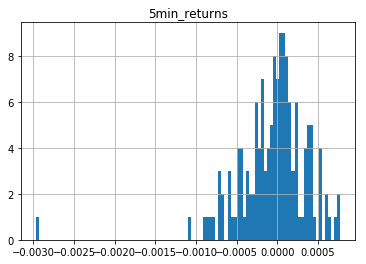

In [32]:
spy_cleaned_df[spy_cleaned_df['trading_hour']==5].hist('5min_returns',bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E3387D9EF0>]],
      dtype=object)

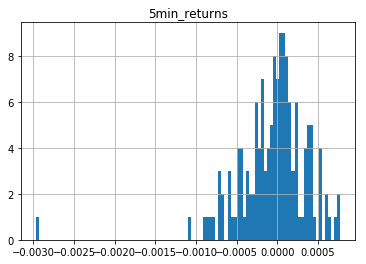

In [33]:
spy_cleaned_df[spy_cleaned_df['trading_hour']==5].hist('5min_returns',bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E33A200898>]],
      dtype=object)

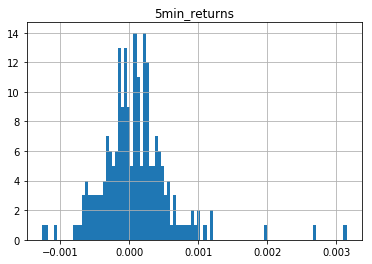

In [48]:
spy_cleaned_df[spy_cleaned_df['trading_hour']==7].hist('5min_returns',bins=100)

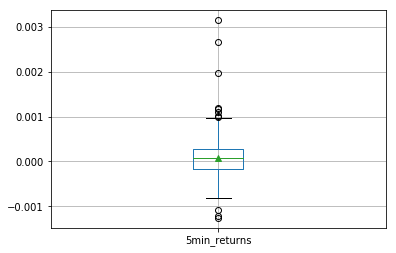

In [35]:
spy_cleaned_df[spy_cleaned_df['trading_hour']==7].boxplot('5min_returns',showmeans=True)

#75 top line blue box
#25 bottom line blue box 
#median = green
#triangle = mean
#whiskers = outside = outliers 1.5x interquartile range +- q1(25) and q3(75)


In [36]:
from scipy.stats import ttest_ind

In [37]:
# spy_cleaned_df[spy_cleaned_df['trading_hour']]

In [38]:
#z score pval<.05
#alpha confidence interval of 95th percentile 

In [39]:
pop_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 719 entries, 2019-09-03 09:40:00 to 2019-09-18 14:30:00
Data columns (total 10 columns):
high            719 non-null float64
low             719 non-null float64
open            719 non-null float64
close           719 non-null float64
volume          719 non-null int64
time            719 non-null object
date            719 non-null object
weekday         719 non-null int64
trading_hour    719 non-null int64
5min_returns    719 non-null float64
dtypes: float64(5), int64(3), object(2)
memory usage: 61.8+ KB


In [40]:
spy_cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 936 entries, 2019-09-03 09:35:00 to 2019-09-18 16:00:00
Data columns (total 10 columns):
high            936 non-null float64
low             936 non-null float64
open            936 non-null float64
close           936 non-null float64
volume          936 non-null int64
time            936 non-null object
date            936 non-null object
weekday         936 non-null int64
trading_hour    936 non-null int64
5min_returns    935 non-null float64
dtypes: float64(5), int64(3), object(2)
memory usage: 80.4+ KB


In [67]:
ttest_ind(spy_cleaned_df[spy_cleaned_df['trading_hour']==7]['5min_returns'].values,
          spy_cleaned_df[spy_cleaned_df['trading_hour']==5]['5min_returns'].values)

Ttest_indResult(statistic=2.7158489669830623, pvalue=0.006931210546454934)

In [65]:
ttest_ind(spy_cleaned_df[spy_cleaned_df['trading_hour']==7]['5min_returns'].values,
          pop_df['5min_returns'].values)

Ttest_indResult(statistic=0.9511750055860346, pvalue=0.34171557789010965)

In [43]:
pop_df['5min_returns'].values

array([ 1.14411555e-03,  5.00773329e-04, -7.23816944e-04,  2.07985974e-03,
       -4.80290919e-04, -5.49167668e-03, -2.95427092e-04, -7.74689606e-04,
        1.34742952e-03, -3.45029845e-05,  1.52370437e-03, -9.35707651e-04,
        3.44839477e-04,  1.20652211e-03,  2.41013634e-04,  7.22866683e-04,
        4.47165658e-04, -1.23775142e-03,  0.00000000e+00, -2.06513133e-03,
        8.96546657e-04,  6.54833707e-04,  3.09981401e-04,  2.75453638e-04,
        4.81911122e-04, -1.37622570e-04,  1.34200475e-03, -4.12371134e-04,
       -8.59460946e-04,  3.09672092e-04, -1.10071547e-03,  5.85399449e-04,
        3.44151151e-04, -5.84855678e-04,  0.00000000e+00, -6.19621343e-04,
        7.57784514e-04, -1.72093343e-04,  7.57341044e-04, -1.61673145e-03,
        1.37816979e-04, -1.37797988e-04,  1.37816979e-04,  3.10045473e-04,
       -2.22819162e-04, -6.38293548e-04,  2.75747966e-04, -8.44245348e-04,
        8.62202756e-05, -3.79336506e-04,  1.72491117e-04, -8.27814570e-04,
        3.45208506e-04,  

In [44]:
spy_cleaned_df[spy_cleaned_df['trading_hour']==2]['5min_returns'].values

array([-9.35707651e-04,  3.44839477e-04,  1.20652211e-03,  2.41013634e-04,
        7.22866683e-04,  4.47165658e-04, -1.23775142e-03,  0.00000000e+00,
       -2.06513133e-03,  8.96546657e-04,  6.54833707e-04,  3.09981401e-04,
        2.73317390e-04, -4.78174739e-04, -2.73373428e-04,  3.93081761e-04,
        3.92927308e-04,  2.04925032e-04, -2.80006829e-05,  6.21495975e-05,
       -5.12190125e-04,  7.17433637e-04,  2.38973098e-04,  7.50878870e-04,
        4.52701117e-04, -2.01109454e-04,  1.17337446e-04, -9.05068383e-04,
        3.01962758e-04, -3.01871604e-04,  3.01962758e-04, -1.34165157e-04,
        2.81784636e-05, -9.33888478e-04,  1.34304805e-04,  6.04290462e-04,
       -1.67554707e-04,  1.34066229e-04,  3.68632708e-04,  1.67833573e-04,
       -1.67805410e-04, -3.01497437e-04, -1.00529455e-04,  1.34052750e-04,
       -3.35086955e-05, -1.67549092e-04,  8.37885846e-05, -1.67563129e-05,
        1.67403241e-04, -2.00850266e-04,  1.33927077e-04, -6.69545713e-05,
        3.34795273e-04,  

In [45]:
#turn into hvplots
#build the dashboard and compare 
#overlay multiple (7) histograms on top of each other 
#switch historgrmas in an interact menu 
#

